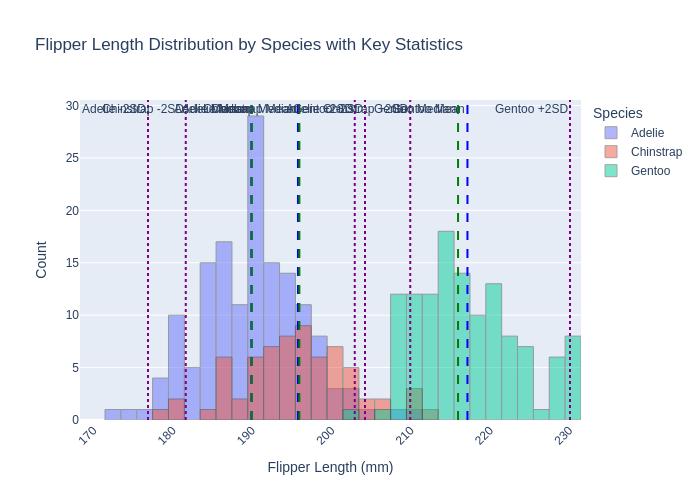

In [57]:
# questoin 1:

import seaborn as sns
import plotly.graph_objects as go
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing flipper_length_mm values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Group data by species
species_groups = penguins.groupby('species')

# Function to calculate statistics
def calc_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    min_val = np.min(data)
    max_val = np.max(data)
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    std = np.std(data)
    lower_2std = mean - 2 * std
    upper_2std = mean + 2 * std
    return mean, median, min_val, max_val, iqr, lower_2std, upper_2std

# Create an empty figure
fig = go.Figure()

# Add histograms and statistics for each species
for species, group in species_groups:
    flipper_length = group['flipper_length_mm']
    
    # Calculate statistics
    mean, median, min_val, max_val, iqr, lower_2std, upper_2std = calc_stats(flipper_length)
    
    # Add histogram for species
    fig.add_trace(go.Histogram(
        x=flipper_length, 
        name=f'{species}', 
        opacity=0.5, 
        nbinsx=20, 
        marker_line=dict(width=1), 
        showlegend=True
    ))
    
    # Add vertical lines for key statistics
    fig.add_vline(x=mean, line=dict(color='blue', width=2, dash='dash'), annotation_text=f'{species} Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', width=2, dash='dash'), annotation_text=f'{species} Median', annotation_position="top left")
    fig.add_vline(x=lower_2std, line=dict(color='purple', width=2, dash='dot'), annotation_text=f'{species} -2SD', annotation_position="top left")
    fig.add_vline(x=upper_2std, line=dict(color='purple', width=2, dash='dot'), annotation_text=f'{species} +2SD', annotation_position="top left")

# Update layout to improve readability
fig.update_layout(
    title="Flipper Length Distribution by Species with Key Statistics",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',  # Overlay histograms
    legend_title="Species",
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show plot
fig.show()
fig.show(renderer="png")

# The chatbot link is below:
# https://chatgpt.com/share/66f48680-d604-8013-871c-6a37b829213d

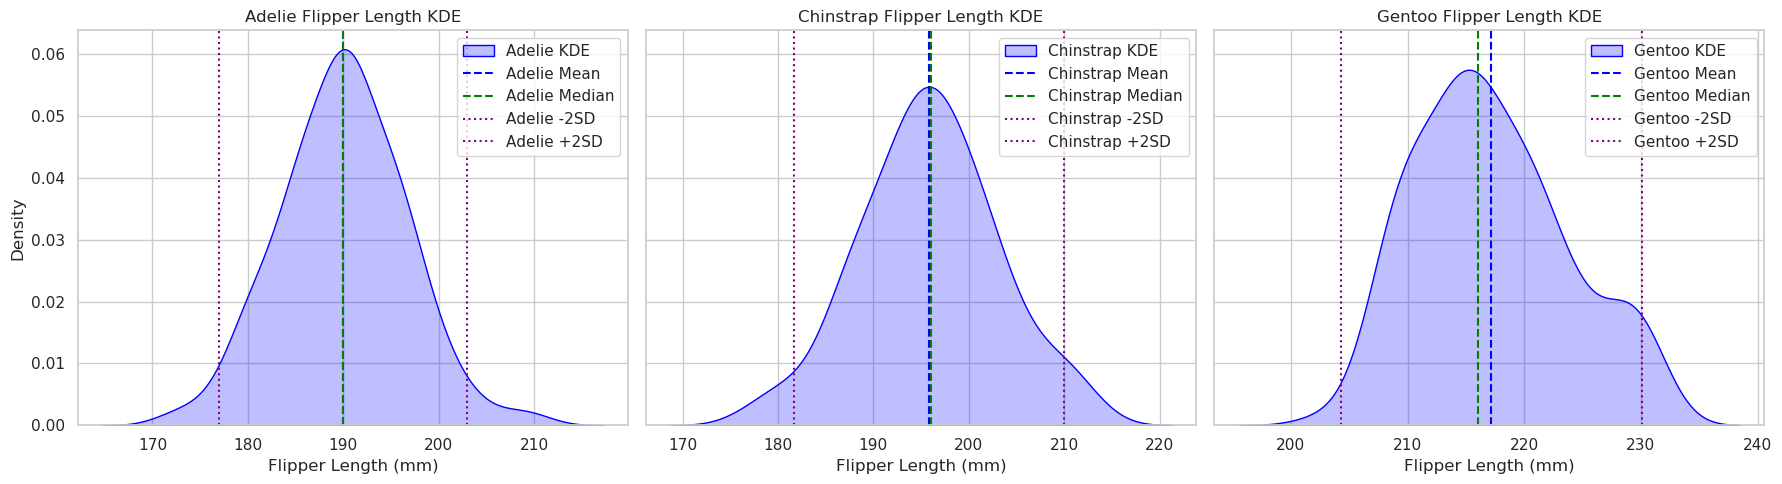

In [58]:
# questio 2:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing flipper_length_mm values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Group data by species
species_groups = penguins.groupby('species')

# Function to calculate statistics
def calc_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    lower_2std = mean - 2 * std
    upper_2std = mean + 2 * std
    return mean, median, lower_2std, upper_2std

# Create a figure with 3 subplots in a row (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Iterate through each species group and plot KDE + statistics
for ax, (species, group) in zip(axes, species_groups):
    flipper_length = group['flipper_length_mm']
    
    # Calculate statistics
    mean, median, lower_2std, upper_2std = calc_stats(flipper_length)
    
    # Plot KDE for the species
    sns.kdeplot(flipper_length, ax=ax, fill=True, label=f'{species} KDE', color='blue')
    
    # Add vertical lines for mean, median, and ±2 SD
    ax.axvline(mean, color='blue', linestyle='--', label=f'{species} Mean')
    ax.axvline(median, color='green', linestyle='--', label=f'{species} Median')
    ax.axvline(lower_2std, color='purple', linestyle=':', label=f'{species} -2SD')
    ax.axvline(upper_2std, color='purple', linestyle=':', label=f'{species} +2SD')

    # Set plot title and labels
    ax.set_title(f'{species} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    
    # Add legend
    ax.legend()

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout()

# Show plot
plt.show()

# The chatbot link is below:
# https://chatgpt.com/share/66f48680-d604-8013-871c-6a37b829213d

In [59]:
# for the question 3:
# I prefer boxplots because they are great for quick summaries and detecting outliers, but lack detail about the overall data shape.
# Quickly displays the minimum, quartiles, median, and maximum values, clearly identifying and isolating outliers.
# Easy to compare multiple data sets side by side. Helps detect skewed data by the location of the median and the length of the whiskers.
# And it's easier to understand, compared to KDE.

# The link of CHATbot is below:
# https://chatgpt.com/share/66f4597f-7824-8013-aed1-9237930f3bb0

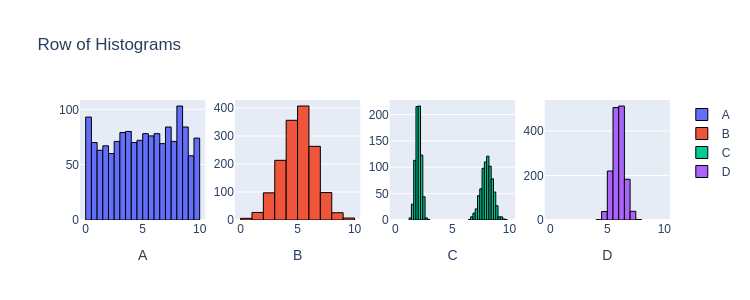

5.067296863268322 5.0777428042452115 5.016852976184874 5.985144143080999
8.365496867910453 2.1900463223510798 9.193196989402065 0.2520891506913268


In [60]:
# question 4(process):

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show()
fig.show(renderer="png")

meanA = np.mean(data1)
meanB = np.mean(data2)
meanC = np.mean(data3)
meanD = np.mean(data4)
print(meanA,meanB,meanC,meanD)
variaA = np.var(data1, ddof=1)
variaB = np.var(data2, ddof=1)
variaC = np.var(data3, ddof=1)
variaD = np.var(data4, ddof=1)
print(variaA,variaB,variaC,variaD)

In [61]:
# question 4(answers):

# Which datasets have similar means and similar variances: A,C
# Which datasets have similar means but quite different variances: B,C
# Which datasets have similar variances but quite different means: A,C
# Which datasets have quite different means and quite different variances: A,D

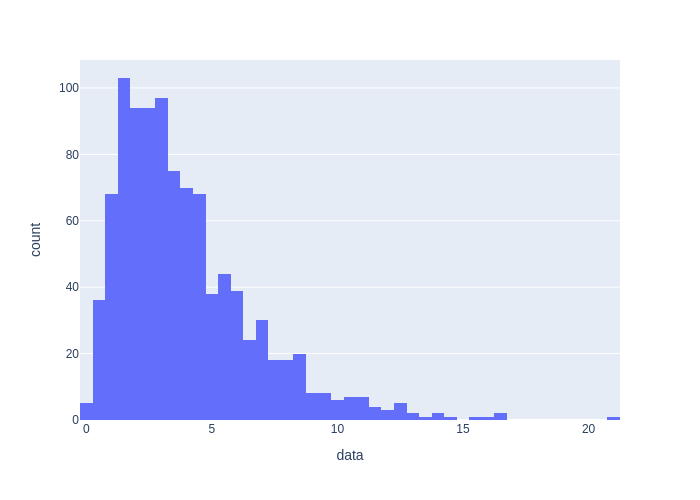

Mean of sample1: 3.9636080080535225
Median of sample1: [3.27040088]


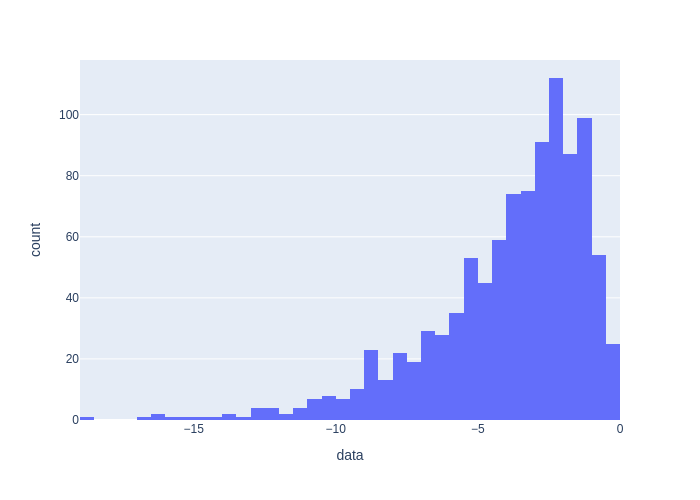

Mean of sample2: -3.9325089982956634
Median of sample2: [-3.21210228]


In [62]:
# question 5

# Right skewness means the right tail is longer and the mean is greater than the median.
# Left skewness means the left tail is longer and the mean is less than the median
# The reason why the difference between the mean and median in skewed distributions happens:
# because the mean is sensitive to extreme values (outliers), while the median is not
# for example: In right-skewed distributions: Most of the data is concentrated on the left (lower values), but some very large values 
# on the right create a long tail. These large values affect the mean by increasing it, while the median remains closer to the middle 
# of the lower values.

from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a sample from a Gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for the first sample
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")  # Display the histogram for sample1

# Calculate the mean and median of sample1
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])  # Median

# Print the mean and median to compare
print("Mean of sample1:", mean_sample1)
print("Median of sample1:", median_sample1)

# Generate a second sample for left-skewed data
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for the second sample
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")  # Display the histogram for sample2

# Print out the mean and median for sample2
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])  # Median
print("Mean of sample2:", mean_sample2)
print("Median of sample2:", median_sample2)

# The link of CHATbot are as belowed:
# https://chatgpt.com/share/66f48b70-28ac-8013-bf0d-bebb1c8e0e6d

1: restaurant id
2: category id
3: item id
4: serving size (oz)
5: calories
6: calories from fat
7: total fat (g)
8: total fat (% daily value)
9: saturated fat (g)
10: saturated fat (% daily value)
11: trans fat (g)
12: cholesterol (mg)
13: cholesterol (% daily value)
14: sodium (mg)
15: sodium (% daily value)
16: carbohydrates (g)
17: carbohydrates (% daily value)
18: dietary fiber (g)
19: dietary fiber (% daily value)
20: sugars (g)
21: protein (g)
22: vitamin a (% daily value)
23: vitamin c (% daily value)
24: calcium (% daily value)
25: iron (% daily value)


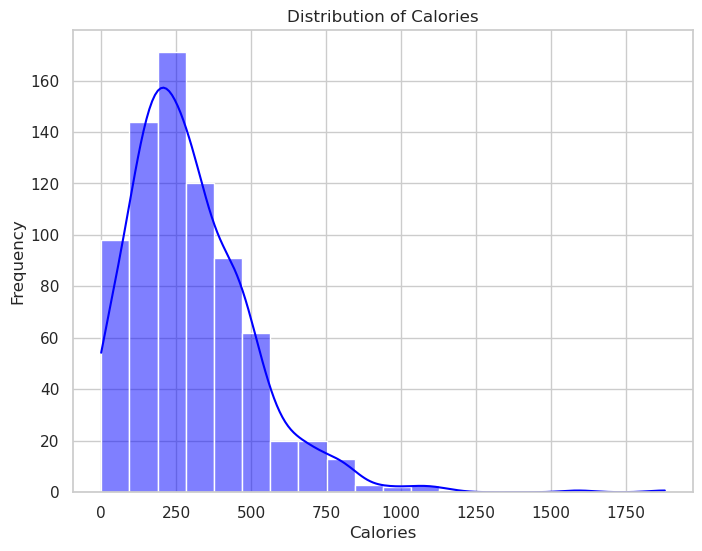

<Figure size 640x480 with 0 Axes>

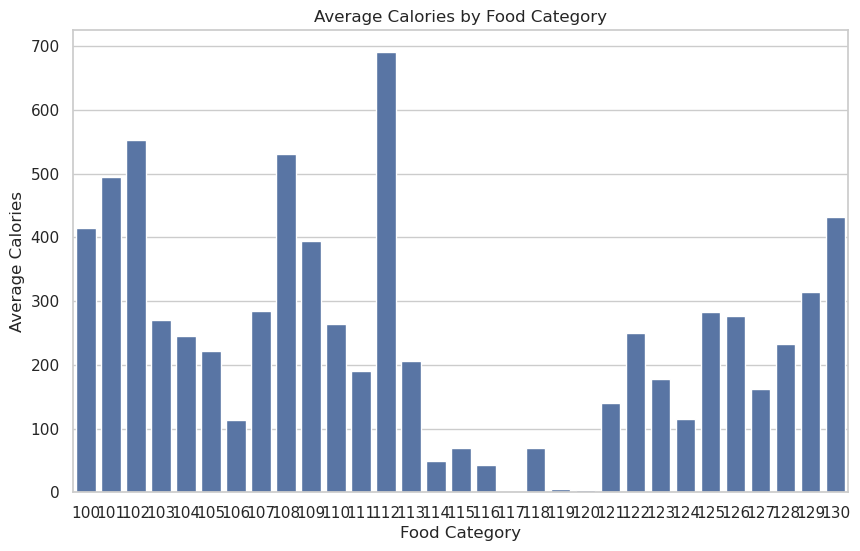

<Figure size 640x480 with 0 Axes>

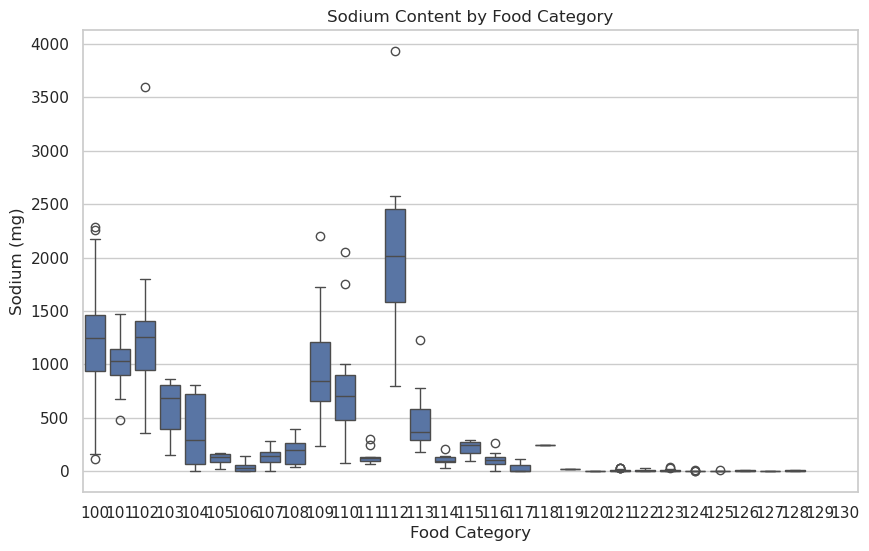

calories  sodium (mg)  protein (g)
count   750.000000    637.00000   750.000000
mean    296.149333    361.55416    11.398400
std     209.034366    580.64465    11.119111
min       0.000000      0.00000     0.000000
25%     150.000000      5.00000     3.000000
50%     260.000000     80.00000     9.000000
75%     410.000000    480.00000    16.000000
max    1880.000000   3930.00000   118.000000

<Figure size 640x480 with 0 Axes>

In [63]:
# questoin 6

import pandas as pd 

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv") 

# Display the column names in a list format
columns = df.columns.tolist()
for i, column in enumerate(columns):
    print(f"{i + 1}: {column}")

# Using visualization way to find the interesting aspects of the dataset, such as highest calories, fat, or sodium content.
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for seaborn plots
sns.set_theme(style="whitegrid")

# 1. Histogram for Calories Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['calories'], kde=True, bins=20, color='blue')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()
plt.savefig('calories_distribution.png')

# 2. Bar Plot: Average Calories by Food Category
# Assuming 'category id' corresponds to food categories
plt.figure(figsize=(10, 6))
avg_calories_by_category = df.groupby('category id')['calories'].mean().reset_index()
sns.barplot(x='category id', y='calories', data=avg_calories_by_category)
plt.title('Average Calories by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Average Calories')
plt.show()
plt.savefig('average_calories_by_category.png')

# 3. Box Plot: Sodium Content Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='category id', y='sodium (mg)', data=df)
plt.title('Sodium Content by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Sodium (mg)')
plt.show()
plt.savefig('sodium_content_by_category.png')

# Generate summary statistics for numerical columns
# After running this code, we can identify metrics, which is the interesting and significant part,
# such as mean, median, minimum, maximum, and standard deviation
df.describe()
# Summarizing key nutritional values
summary = df[['calories', 'total fat (g)', 'sodium (mg)', 'protein (g)']].describe()
summary


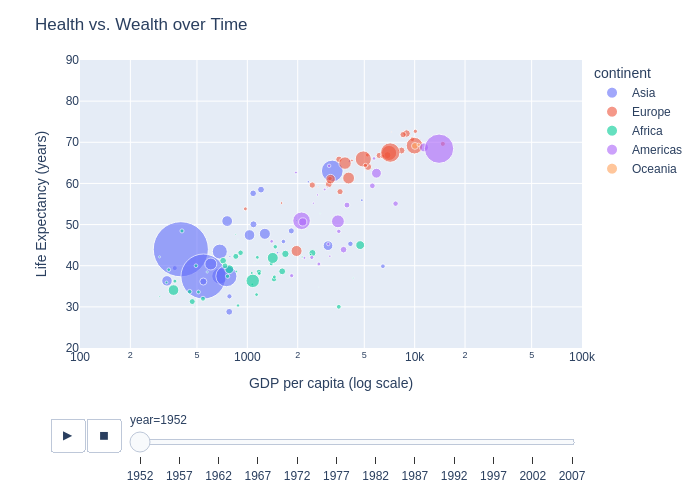

In [64]:
# question 7
!pip install plotly pandas

import plotly.express as px
import pandas as pd

# Load the Gapminder dataset
df = px.data.gapminder()

# Create the animated scatter plot with original bubble size
fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=60,  # Larger bubbles
                 opacity=0.6,  # Keep transparency to handle overlap
                 range_x=[100,100000], range_y=[20,90])

# Update layout
fig.update_layout(title='Health vs. Wealth over Time',
                  xaxis_title='GDP per capita (log scale)',
                  yaxis_title='Life Expectancy (years)',
                  showlegend=True)

# Show the plot
fig.show()
fig.show(renderer="png")

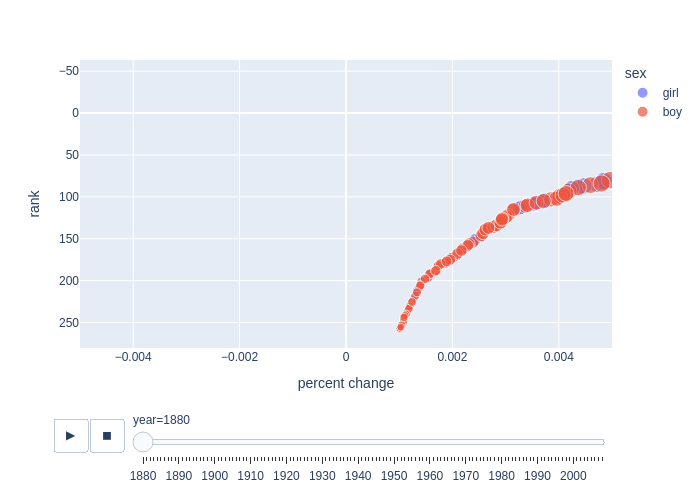

In [31]:
# question 8
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex'] 

# Rank names by percent prevalence within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the DataFrame
bn = bn.sort_values(['name', 'year'])

# Calculate percent change from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 

# Sort by year and restrict to common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # restrict to "common" names

# Create the scatter plot with the specified parameters
fig = px.scatter(bn, 
                 x="percent change",  # X-axis: Percent Change
                 y="rank",           # Y-axis: Rank
                 animation_frame="year",  # Animation: Year
                 animation_group="name",   # Grouping by name
                 size="percent",        # Size based on Percent
                 color="sex",          # Color based on Sex
                 hover_name="name",    # Hover text: Name
                 size_max=50,          # Max size of bubbles
                 range_x=[-0.005, 0.005])  # Range for X-axis

# Update y-axis to reverse rank display
fig.update_yaxes(autorange='reversed')  # Rank 1 at the top

# Show the plot
fig.show()
fig.show(renderer="png")  

In [ ]:
# quesiton 9
# yes, I went to the office hour.